<a href="https://colab.research.google.com/github/MahimaManuela/Xebia/blob/main/Copy_of_Copy_of_Copy_of_Xebia_MachineLearning_basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing data from the csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("/content/drive/MyDrive/Xebia/amazonLabelled.xlsx")


In [ ]:
df.head()

,S,Feedback,Sentiment
0,1.0,"Good case, Excellent value.",Positive
1,2.0,Great for the jawbone.,Positive
2,3.0,Tied to charger for conversations lasting more...,Negative
3,4.0,The mic is great.,Positive
4,5.0,I have to jiggle the plug to get it to line up...,Negative


In [ ]:
df.shape

(999, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S          999 non-null    float64
 1   Feedback   999 non-null    object 
 2   Sentiment  999 non-null    object 
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 499.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

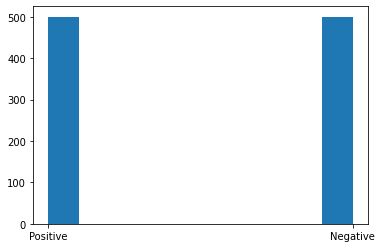

In [ ]:
plt.hist(df['Sentiment'])

#Univariate analysis

In [ ]:
df['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

###Removing the S column as it corresponds to index

In [ ]:
df.drop(['S'],inplace=True,axis=1)

In [ ]:
df.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative


In [ ]:
df['Sentiment'].value_counts()

Positive    500
Negative    499
Name: Sentiment, dtype: int64

So the target classes is almost balanced

Data preprocessing for the textual data part

In [ ]:
df.head(10)

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative
5,If you have several dozen or several hundred c...,Negative
6,If you are Razr owner...you must have this!,Positive
7,"Needless to say, I wasted my money.",Negative
8,What a waste of money and time!.,Negative
9,And the sound quality is great.,Positive


In [ ]:
#Dividing the data into depenent and indepent features
X=df.drop(['Sentiment'],axis=1) # in the X we will have only the feedback minus the sentiment

In [ ]:
y=df['Sentiment'] # in y we will have only the sentiments

In [ ]:
X

,Feedback
0,"Good case, Excellent value."
1,Great for the jawbone.
2,Tied to charger for conversations lasting more...
3,The mic is great.
4,I have to jiggle the plug to get it to line up...
...,...
994,The screen does get smudged easily because it ...
995,What a piece of junk.. I lose more calls on th...
996,Item Does Not Match Picture.
997,The only thing that disappoint me is the infra...


Performing stemming and lemitization


In [ ]:
# df.head(4)
X, y = df['Feedback'], df['Sentiment']

In [ ]:
X = list(X)


# Tokenization and Convertnig into lowercase

In [ ]:

texts = [[word.lower() for word in text.split()] for text in X]
texts[1:3]

[['great', 'for', 'the', 'jawbone.'],
 ['tied',
  'to',
  'charger',
  'for',
  'conversations',
  'lasting',
  'more',
  'than',
  '45',
  'minutes.major',
  'problems!!']]

In [ ]:
import string
def remove_punctuation(from_text):
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in from_text]
    return stripped
texts1 = [remove_punctuation(i) for i in texts]

In [ ]:
texts1[1:3]

[['great', 'for', 'the', 'jawbone'],
 ['tied',
  'to',
  'charger',
  'for',
  'conversations',
  'lasting',
  'more',
  'than',
  '45',
  'minutesmajor',
  'problems']]

# Remove Stop Words

In [ ]:
import nltk

nltk.download('stopwords')






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

i=0
texts2 = []
for i in texts1:
  lst = []
  for word in i:
     if word not in stopwords.words('english'):
       lst.append(word)
  texts2.append(lst)



In [ ]:
texts2[1:4]

[['great', 'jawbone'],
 ['tied',
  'charger',
  'conversations',
  'lasting',
  '45',
  'minutesmajor',
  'problems'],
 ['mic', 'great']]

# Lemmatization

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()






[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
texts3 = []

for words in texts2:
  w = []
  for word in words:
    w.append(wordnet_lem.lemmatize(word))
  texts3.append(w)

In [ ]:
texts3[0:3]

[['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tied',
  'charger',
  'conversation',
  'lasting',
  '45',
  'minutesmajor',
  'problem']]

Sentiment colulmn as binary values

In [ ]:

y = list(y)


In [ ]:

a = len(y)
for x in range(a): 
  if y[x] == 'Positive':   
    y[x] = 1
  else:
    y[x] = 0
  

In [ ]:
y[0:4]

[1, 1, 0, 1]

In [ ]:
texts3[0:4]

[['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tied',
  'charger',
  'conversation',
  'lasting',
  '45',
  'minutesmajor',
  'problem'],
 ['mic', 'great']]

# Splitting Data to Train and Test

In [ ]:
# 33% for test and 67 percent for train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))

In [ ]:
Xtrain_vec = cv.fit_transform(X_train).toarray()

In [ ]:
Xtrain_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Xtest_vec = cv.transform(X_test).toarray()

# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mn = MultinomialNB()

In [ ]:
mn.fit(Xtrain_vec, y_train)

MultinomialNB()

In [ ]:
y_pred = mn.predict(Xtest_vec)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [ ]:
import numpy as np


In [ ]:
a = np.array(y_pred)
b = np.array(y_test)
error = np.mean( a != b )


In [ ]:
print(100-error*100,'%')

81.21212121212122 %
